In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40948 stdev: 0.19986
Best fitness: 0.96132 - size: (2, 7) - species 4 - id 167
Average adjusted fitness: 0.391
Mean genetic distance 2.825, standard deviation 0.466
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53043 stdev: 0.23911
Best fitness: 0.96712 - size: (3, 9) - species 2 - id 343
Average adjusted fitness: 0.513
Mean genetic distance 2.920, standard deviation 0.459
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.033 sec (5.331 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58335 stdev: 0.22687
Best fitness: 0.96712 - size: (3, 9) - species 5 - id 343
Average adjusted fitness: 0.515
Mean genetic distance 3.024, standard deviation 0.466
Population of 205 members in 34 species
Total extinctions

Population's average fitness: 0.53792 stdev: 0.10324
Best fitness: 0.97295 - size: (3, 9) - species 14 - id 338
Average adjusted fitness: 0.326
Mean genetic distance 2.973, standard deviation 0.516
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.610 sec (5.207 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54188 stdev: 0.11853
Best fitness: 0.97295 - size: (3, 9) - species 14 - id 338
Average adjusted fitness: 0.480
Mean genetic distance 3.043, standard deviation 0.541
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.916 sec (5.325 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54827 stdev: 0.13024
Best fitness: 0.97295 - size: (3, 9) - species 14 - id 338
Average adjusted fitness: 0.517
Mean genetic distance 3.059, standard deviation 0.568
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.855 sec (5.401 average)

 ****** Running

Population's average fitness: 0.58195 stdev: 0.22991
Best fitness: 0.96301 - size: (3, 10) - species 3 - id 1138
Average adjusted fitness: 0.315
Mean genetic distance 3.065, standard deviation 0.535
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.213 sec (3.962 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60143 stdev: 0.22650
Best fitness: 0.96369 - size: (4, 10) - species 26 - id 1559
Average adjusted fitness: 0.370
Mean genetic distance 3.080, standard deviation 0.546
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 4.336 sec (3.999 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61037 stdev: 0.22578
Best fitness: 0.96369 - size: (4, 10) - species 26 - id 1559
Average adjusted fitness: 0.445
Mean genetic distance 3.111, standard deviation 0.551
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 4.328 sec (4.098 average)

 ****** R

Population's average fitness: 0.61532 stdev: 0.20945
Best fitness: 0.94682 - size: (2, 8) - species 19 - id 373
Average adjusted fitness: 0.417
Mean genetic distance 3.113, standard deviation 0.512
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 5.424 sec (4.550 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60637 stdev: 0.21685
Best fitness: 0.94682 - size: (2, 8) - species 19 - id 373
Average adjusted fitness: 0.478
Mean genetic distance 3.122, standard deviation 0.519
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 4.669 sec (4.603 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61867 stdev: 0.20695
Best fitness: 0.94682 - size: (2, 8) - species 19 - id 373
Average adjusted fitness: 0.412
Mean genetic distance 3.089, standard deviation 0.527
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 4.822 sec (4.662 average)

 ****** Runni

Generation time: 6.714 sec (6.546 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60751 stdev: 0.17584
Best fitness: 0.99100 - size: (5, 15) - species 6 - id 1277
Average adjusted fitness: 0.211
Mean genetic distance 3.204, standard deviation 0.510
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.603 sec (6.544 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60458 stdev: 0.18011
Best fitness: 0.99100 - size: (5, 15) - species 6 - id 1277
Average adjusted fitness: 0.388
Mean genetic distance 3.214, standard deviation 0.511
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 6.990 sec (6.601 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60819 stdev: 0.18969
Best fitness: 0.99100 - size: (5, 15) - species 6 - id 1277
Average adjusted fitness: 0.529
Mean genetic distance 3.224, standard deviation 0.540
Population of 191 members in 26 

Population's average fitness: 0.54170 stdev: 0.16404
Best fitness: 0.97539 - size: (3, 9) - species 7 - id 218
Average adjusted fitness: 0.452
Mean genetic distance 2.885, standard deviation 0.500
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 2.206 sec (2.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58087 stdev: 0.18431
Best fitness: 0.97539 - size: (3, 9) - species 8 - id 218
Average adjusted fitness: 0.529
Mean genetic distance 2.923, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 2.421 sec (2.229 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59204 stdev: 0.18270
Best fitness: 0.97539 - size: (3, 9) - species 8 - id 218
Average adjusted fitness: 0.491
Mean genetic distance 2.984, standard deviation 0.494
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 2.563 sec (2.313 average)

 ****** Running ge

Population's average fitness: 0.59580 stdev: 0.16956
Best fitness: 0.93151 - size: (5, 13) - species 25 - id 824
Average adjusted fitness: 0.443
Mean genetic distance 3.104, standard deviation 0.492
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 2.839 sec (2.663 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60062 stdev: 0.17635
Best fitness: 0.93151 - size: (5, 13) - species 25 - id 824
Average adjusted fitness: 0.481
Mean genetic distance 3.107, standard deviation 0.509
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 2.753 sec (2.676 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60986 stdev: 0.17827
Best fitness: 0.93151 - size: (5, 13) - species 25 - id 824
Average adjusted fitness: 0.425
Mean genetic distance 3.088, standard deviation 0.514
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 2.922 sec (2.707 average)

 ****** Runn

Population's average fitness: 0.69138 stdev: 0.24637
Best fitness: 0.98484 - size: (4, 11) - species 31 - id 1236
Average adjusted fitness: 0.649
Mean genetic distance 3.126, standard deviation 0.522
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 4.393 sec (4.268 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67273 stdev: 0.25211
Best fitness: 0.98484 - size: (4, 11) - species 31 - id 1236
Average adjusted fitness: 0.606
Mean genetic distance 3.147, standard deviation 0.533
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 4.424 sec (4.266 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69727 stdev: 0.25167
Best fitness: 0.98484 - size: (4, 11) - species 31 - id 1236
Average adjusted fitness: 0.665
Mean genetic distance 3.157, standard deviation 0.545
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 4.769 sec (4.368 average)

 ******

Population's average fitness: 0.56724 stdev: 0.18500
Best fitness: 0.70930 - size: (2, 6) - species 8 - id 1631
Average adjusted fitness: 0.248
Mean genetic distance 2.979, standard deviation 0.493
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 4.342 sec (4.057 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57981 stdev: 0.17990
Best fitness: 0.70930 - size: (2, 6) - species 37 - id 1631
Average adjusted fitness: 0.268
Mean genetic distance 3.000, standard deviation 0.481
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 4.274 sec (4.106 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57386 stdev: 0.18304
Best fitness: 0.70930 - size: (7, 15) - species 20 - id 1222
Average adjusted fitness: 0.259
Mean genetic distance 2.997, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 4.196 sec (4.147 average)

 ****** Ru

Population's average fitness: 0.61032 stdev: 0.20204
Best fitness: 0.93711 - size: (5, 11) - species 12 - id 2204
Average adjusted fitness: 0.470
Mean genetic distance 3.092, standard deviation 0.512
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 4.537 sec (4.464 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58806 stdev: 0.21627
Best fitness: 0.93711 - size: (5, 11) - species 12 - id 2204
Average adjusted fitness: 0.383
Mean genetic distance 3.118, standard deviation 0.517
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 4.514 sec (4.509 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57868 stdev: 0.21924
Best fitness: 0.93711 - size: (5, 11) - species 12 - id 2204
Average adjusted fitness: 0.381
Mean genetic distance 3.107, standard deviation 0.531
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 4.665 sec (4.550 average)
number o

Population's average fitness: 0.51433 stdev: 0.05793
Best fitness: 0.78531 - size: (2, 7) - species 2 - id 85
Average adjusted fitness: 0.335
Mean genetic distance 2.832, standard deviation 0.518
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 2.240 sec (2.135 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52089 stdev: 0.06261
Best fitness: 0.82486 - size: (4, 9) - species 1 - id 492
Average adjusted fitness: 0.380
Mean genetic distance 2.914, standard deviation 0.548
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 2.296 sec (2.189 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52368 stdev: 0.06685
Best fitness: 0.82486 - size: (4, 9) - species 1 - id 492
Average adjusted fitness: 0.395
Mean genetic distance 2.964, standard deviation 0.561
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 2.405 sec (2.243 average)

 ****** Running gen

Population's average fitness: 0.63171 stdev: 0.16695
Best fitness: 0.72127 - size: (2, 9) - species 4 - id 536
Average adjusted fitness: 0.348
Mean genetic distance 2.890, standard deviation 0.497
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 3.954 sec (3.717 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64636 stdev: 0.15292
Best fitness: 0.72333 - size: (3, 11) - species 9 - id 1148
Average adjusted fitness: 0.376
Mean genetic distance 2.913, standard deviation 0.506
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 3.959 sec (3.752 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62720 stdev: 0.16967
Best fitness: 0.72333 - size: (3, 11) - species 9 - id 1148
Average adjusted fitness: 0.349
Mean genetic distance 2.925, standard deviation 0.519
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.080 sec (3.793 average)

 ****** Runnin

Population's average fitness: 0.60336 stdev: 0.18364
Best fitness: 0.89058 - size: (4, 13) - species 7 - id 1482
Average adjusted fitness: 0.370
Mean genetic distance 2.986, standard deviation 0.583
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.321 sec (4.178 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62559 stdev: 0.17638
Best fitness: 0.89058 - size: (4, 13) - species 7 - id 1482
Average adjusted fitness: 0.379
Mean genetic distance 2.992, standard deviation 0.584
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.356 sec (4.266 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60080 stdev: 0.19098
Best fitness: 0.89058 - size: (4, 13) - species 7 - id 1482
Average adjusted fitness: 0.421
Mean genetic distance 2.988, standard deviation 0.567
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 4.388 sec (4.337 average)

 ****** Ru

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.6985

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[2] real:3
#11 index:[2] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2 5] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[5] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[2 3 5] real:5
#30 index:[2 3] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[2] real:3
#39 index:[2] real:3
#40 index:[2] real:3
#41 index:[0] real:3
#42 index:[2 5] real:2
#43 index:[5] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[5] real:2
#47 index:[2]

#520 index:[4] real:4
#521 index:[1] real:1
#522 index:[1] real:1
#523 index:[1] real:1
#524 index:[5] real:3
#525 index:[5] real:3
#526 index:[2] real:3
#527 index:[1] real:1
#528 index:[1] real:1
#529 index:[1] real:1
#530 index:[1] real:1
#531 index:[4 5] real:5
#532 index:[2 3 5] real:2
#533 index:[5] real:5
#534 index:[2] real:5
#535 index:[2] real:5
#536 index:[5] real:5
#537 index:[5] real:5
#538 index:[2] real:5
#539 index:[4] real:4
#540 index:[4] real:4
#541 index:[4] real:4
#542 index:[4] real:4
#543 index:[4] real:4
#544 index:[4] real:4
#545 index:[1] real:1
#546 index:[1] real:1
#547 index:[1] real:1
#548 index:[2] real:3
#549 index:[2] real:3
#550 index:[2] real:3
#551 index:[5] real:3
#552 index:[5] real:3
#553 index:[4] real:1
#554 index:[1] real:1
#555 index:[1] real:1
#556 index:[1] real:1
#557 index:[1] real:1
#558 index:[1] real:1
#559 index:[5] real:5
#560 index:[5] real:5
#561 index:[5] real:5
#562 index:[5] real:5
#563 index:[5] real:5
#564 index:[5] real:5
#565

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[445   8   5   5  22   1]
 [  2 198   0   0   9   0]
 [  7   1 320 149  10 173]
 [  1   0   2   5   1  15]
 [  6  16   0   4 160  12]
 [  0   1  70  48  35 269]]


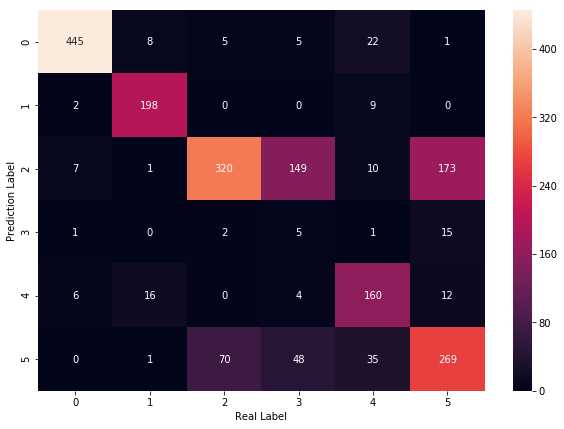

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()